In [345]:
import numpy as np
import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib
import six
import warnings

warnings.filterwarnings("ignore")
matplotlib.style.use('default')

In [346]:
# Class definitions

class Location(object):
    def init(self, name, population, cases, casesPerCapita):
        
        self.name = name
        self.population = population
        self.cases = cases
        self.casesPerCapita = casesPerCapita

In [347]:
# Function definitions

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

In [348]:
data = pd.read_csv(r"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Data/Raw_data/owid-covid-data.csv")

In [349]:
df1 = data.set_index('location')

location = df1.loc['Africa']
location['total_cases'].max()

10124569.0

In [350]:
countries = list(data['location'].unique())
locations = []

# Remove aggregated locations
countries.remove('Africa')
countries.remove('Asia')
countries.remove('North America')
countries.remove('South America')
countries.remove('Europe')
countries.remove('Oceania')
countries.remove('World')
countries.remove('Low income')
countries.remove('High income')
countries.remove('Lower middle income')
countries.remove('Upper middle income')

for i, country in enumerate(countries):
    locations.append( Location() )
    
    temp = df1.loc[country]
    locations[i].name = country
    locations[i].population = temp['population'].max()
    
    locations[i].cases = temp['total_cases'].max()    
    locations[i].casesPerCapita = locations[i].cases / locations[i].population


In [351]:
name, casesPerCapita = [], []

for i in range(len(locations)):
    name.append(locations[i].name)
    casesPerCapita.append(locations[i].casesPerCapita)

In [352]:
# Create a dataframe for list of countries and their current total_cases

d = {'Country': countries, 'Cases per capita': casesPerCapita, 'Deaths per capita': deathsPerCapita, 'Vacc per capita': vaccPerCapita}
df = pd.DataFrame(d)

<AxesSubplot:title={'center':'Cases per capita'}, ylabel='Density'>

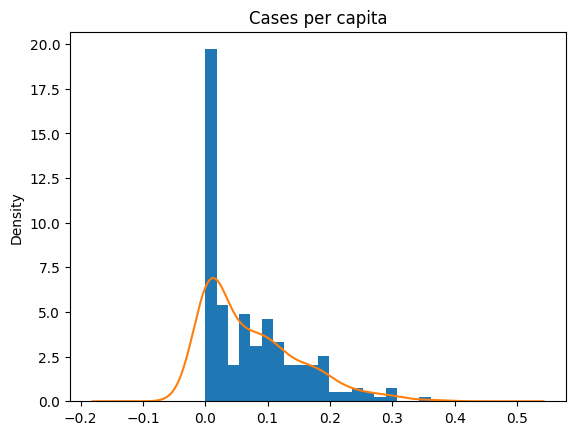

In [353]:
ax = df.hist('Cases per capita', grid = False, bins = 20, density=True)
df['Cases per capita'].plot.kde()

<AxesSubplot:>

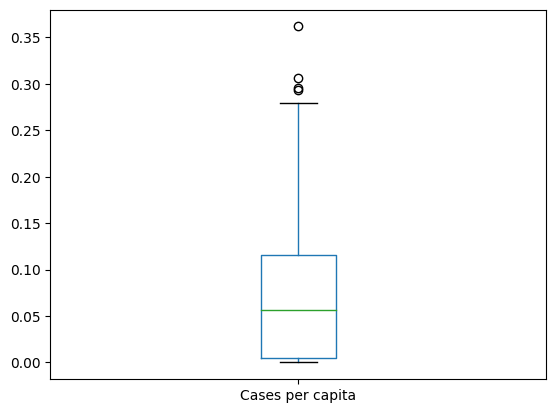

In [354]:
# Box-and-whisker plots of per capita data

df.boxplot('Cases per capita', grid = False)

In [359]:
# Rank order the top ten countries with the highest Covid19 cases, deaths, vaccinated per capita
save_table = False

if save_table:
    df1 = df.drop('Vacc per capita', 1).drop('Deaths per capita', 1).dropna().round(decimals = 4).sort_values('Cases per capita', axis=0, ascending = False, ignore_index = True).head(10)
    ax = render_mpl_table(df1, header_columns=0, col_width=2.0)
    fig = ax.get_figure()
    fig.savefig('temp1.png')
    
df.drop('Vacc per capita', 1).drop('Deaths per capita', 1).dropna().round(decimals = 4).sort_values('Cases per capita', axis=0, ascending = False, ignore_index = True).head(10)

,Country,Cases per capita
0,Andorra,0.3618
1,Montenegro,0.3060
2,Gibraltar,0.2959
3,Seychelles,0.2935
4,San Marino,0.2799
5,Aruba,0.2602
6,Slovakia,0.2561
7,Georgia,0.2419
8,Slovenia,0.2373
9,Czechia,0.2360
